In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Importing data and saving in data directory on pc.

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [12]:
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

228827136/228813984 [==============================] - 84s 0us/step


In [13]:
data_dir

'.\\datasets\\flower_photos'

In [14]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [15]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [19]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

### There are total 3670 flower images we have.

In [26]:
roses=list(data_dir.glob('roses/*'))

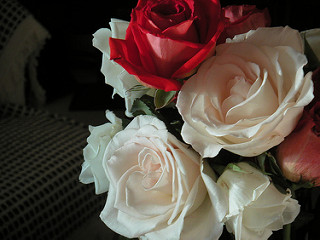

In [27]:
PIL.Image.open(str(roses[1]))

In [31]:
## Creating dictionary of flowers
flowers_list={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [33]:
## Creating labels dictionary
labels_list={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [38]:
# Coverting images into numpy array
x,y= [], []
for flower_name, images in flowers_list.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(labels_list[flower_name])

In [42]:
x=np.array(x)
y=np.array(y)

### Splitting data into train & test

In [43]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test=train_test_split(x,y,random_state=0)

In [44]:
# Scalling data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [47]:
cnn=Sequential([
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
)

cnn.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 25s 284ms/step - loss: 1.3329 - accuracy: 0.4259
Epoch 2/30
86/86 [==============================] - 26s 304ms/step - loss: 1.0135 - accuracy: 0.6010
Epoch 3/30
86/86 [==============================] - 25s 291ms/step - loss: 0.8367 - accuracy: 0.6766
Epoch 4/30
86/86 [==============================] - 25s 287ms/step - loss: 0.6046 - accuracy: 0.7653
Epoch 5/30
86/86 [==============================] - 25s 288ms/step - loss: 0.3643 - accuracy: 0.8692
Epoch 6/30
86/86 [==============================] - 26s 301ms/step - loss: 0.2251 - accuracy: 0.9270
Epoch 7/30
86/86 [==============================] - 28s 321ms/step - loss: 0.1189 - accuracy: 0.9604
Epoch 8/30
86/86 [==============================] - 27s 312ms/step - loss: 0.1072 - accuracy: 0.9695
Epoch 9/30
86/86 [==============================] - 30s 349ms/step - loss: 0.0570 - accuracy: 0.9866
Epoch 10/30
86/86 [==============================] - 29s 341ms/step - loss: 0.0292 - accura

In [48]:
cnn.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 2s 76ms/step - loss: 2.1468 - accuracy: 0.6754


[2.146820068359375, 0.6753812432289124]

### We can see training model accuracy is 99.93% and test model accuracy is 67.53% therefore overfitting is there.

In [53]:
y_pred=cnn.predict(x_test)

y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[1, 0, 1, 4, 3]

### Data augmentation

In [55]:
data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

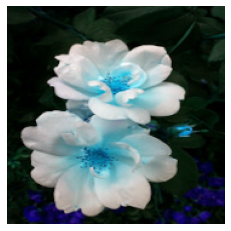

In [57]:
plt.axis('off')
plt.imshow(x[0])

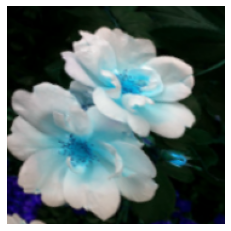

In [59]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [61]:
cnn=Sequential([
    data_augmentation,
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
)

cnn.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 30s 332ms/step - loss: 1.3230 - accuracy: 0.4201
Epoch 2/30
86/86 [==============================] - 29s 334ms/step - loss: 1.0444 - accuracy: 0.5763
Epoch 3/30
86/86 [==============================] - 29s 341ms/step - loss: 0.9230 - accuracy: 0.6406
Epoch 4/30
86/86 [==============================] - 29s 339ms/step - loss: 0.8508 - accuracy: 0.6661
Epoch 5/30
86/86 [==============================] - 29s 335ms/step - loss: 0.8121 - accuracy: 0.6806
Epoch 6/30
86/86 [==============================] - 29s 337ms/step - loss: 0.7701 - accuracy: 0.7111
Epoch 7/30
86/86 [==============================] - 29s 338ms/step - loss: 0.7271 - accuracy: 0.7246
Epoch 8/30
86/86 [==============================] - 31s 357ms/step - loss: 0.7087 - accuracy: 0.7380
Epoch 9/30
86/86 [==============================] - 33s 385ms/step - loss: 0.6659 - accuracy: 0.7358
Epoch 10/30
86/86 [==============================] - 30s 353ms/step - loss: 0.6327 - accura

In [62]:
cnn.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 2s 81ms/step - loss: 0.8583 - accuracy: 0.7549


[0.8582810163497925, 0.7549019455909729]

### Now accuracy is increased after data augmentation to 0.7549